In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
sns.set(style='white', context='notebook', palette='deep')



In [32]:
from google.colab import files
files.upload()

{}

In [33]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle


kaggle.json


In [4]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        267           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        108           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        359           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2413           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18505           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4770           False  
connectx

In [5]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 88.8MB/s]
 99% 6.00M/6.09M [00:00<00:00, 61.6MB/s]
100% 6.09M/6.09M [00:00<00:00, 55.9MB/s]
 55% 5.00M/9.16M [00:00<00:00, 48.0MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.5MB/s]


In [6]:
!unzip -q '../content/train.csv.zip'
!unzip -q '../content/test.csv.zip'

In [35]:
#load data
train=pd.read_csv('../content/train.csv')
test=pd.read_csv('../content/test.csv')

In [37]:
Y_train=train['label']
X_train=train.drop(columns=['label'])


In [38]:
# Freeing Some memory
del train

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

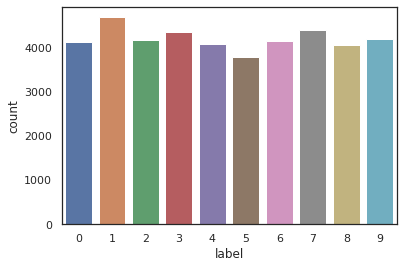

In [39]:
g=sns.countplot(Y_train)
Y_train.value_counts()

In [40]:
X_train.shape
Y_train.shape

(42000,)

In [41]:
# Normalizing the data
X_train=X_train/255
test=test/255

In [42]:
# Reshaping the data
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [43]:
#  Encoding y to one hot vector
Y_train=to_categorical(Y_train,num_classes=10)

In [44]:
#spliting the data
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1)

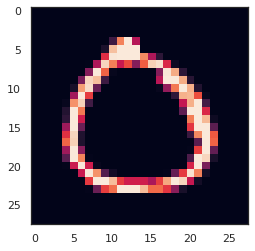

In [45]:
g=plt.imshow(X_train[0,:,:,0])

In [46]:
from tensorflow.keras.models import Sequential

Building Model


In [47]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='softmax'))

In [48]:
history=model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Data Augmentation to avoid overfitting

In [49]:
datagen=ImageDataGenerator(rotation_range=10,
                           zoom_range=0.1,
                           width_shift_range=0.1,
                           height_shift_range=0.1)
datagen.fit(X_train)

Fit The MOdel

In [50]:
history=model.fit(X_train,Y_train,batch_size=86,epochs=10,validation_data=(X_val,Y_val),steps_per_epoch=X_train.shape[0]//86)

Epoch 1/10
439/439 [==============================] - 252s 575ms/step - loss: 0.2572 - accuracy: 0.9168 - val_loss: 0.0603 - val_accuracy: 0.9802
Epoch 2/10
439/439 [==============================] - 252s 575ms/step - loss: 0.0795 - accuracy: 0.9759 - val_loss: 0.0432 - val_accuracy: 0.9876
Epoch 3/10
439/439 [==============================] - 252s 575ms/step - loss: 0.0607 - accuracy: 0.9822 - val_loss: 0.0445 - val_accuracy: 0.9852
Epoch 4/10
439/439 [==============================] - 256s 582ms/step - loss: 0.0486 - accuracy: 0.9856 - val_loss: 0.0400 - val_accuracy: 0.9886
Epoch 5/10
439/439 [==============================] - 259s 589ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0283 - val_accuracy: 0.9921
Epoch 6/10
439/439 [==============================] - 252s 575ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0307 - val_accuracy: 0.9900
Epoch 7/10
439/439 [==============================] - 259s 589ms/step - loss: 0.0327 - accuracy: 0.9903 - val_loss: 0.0270 -

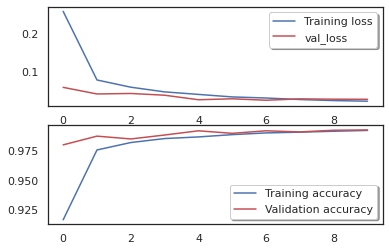

In [55]:
# Evaluate the model
# plotting the accuracy curve for training and validation Curves
#  Plot the loss and accuracy curves for training and validation 

fig,ax=plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b',label='Training loss')
ax[0].plot(history.history['val_loss'],color='r',label='val_loss')
legend=ax[0].legend(loc='best',shadow=True)

ax[1].plot(history.history['accuracy'],color='b',label='Training accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation accuracy')
lehend=ax[1].legend(loc='best',shadow=True)

Plotting Confusion matrix

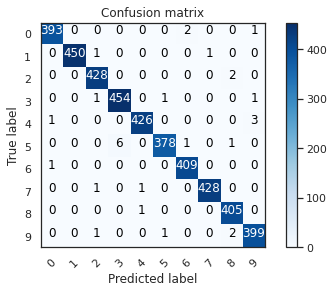

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [58]:
results=model.predict(test)

#select the index with the maximum probability
results=np.argmax(results,axis=1)
results=pd.Series(results,name='Label')

In [60]:
submission=pd.concat([pd.Series(range(1,28001),name='ImageId'),results],axis=1)
submission.to_csv('cnn_mnist_datagen.csv',index=False)